# 2D Virtual homo-decoupling in a 2D methyl H-C—HMQC with J-coupling around 35 Hz

In [1]:
import time
import numpy as np
import nmrglue as ng
import MRAi_2D as ma
import Proc_2D as pr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':25})

2024-09-12 07:09:22.233403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 07:09:23.344459: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Define the path (direction) of the spectrum process in pipe format.
For example, the path to the high resolution methyl 2D H-C—HMQC spectrum of protein MALT1.
Replace this path with your actual spectrum file.

In [2]:
%%time
spectrum_direction = "Spectra/Malt_CC.ft2"
Dic , Ref = ng.pipe.read(spectrum_direction)

CPU times: user 888 μs, sys: 516 μs, total: 1.4 ms
Wall time: 1.52 ms


### Call the function with the default direction that runs the trained network for virtual decoupling.

In [3]:
%%time
DNN_dirc = "Trained_NN/VD_ID/"
dic , ref = pr.pipe_generator.iFT_ID(Dic,Ref)
VE = ma.convertors.US_VE(ref,256)
pred = ma.Production.VD_ID(VE, DNN_dirc)
ft1 = np.zeros_like(ref)
ft1[:min(int(pred.shape[0]),int(ft1.shape[0]))] = pred[:min(int(pred.shape[0]),int(ft1.shape[0]))]
_, VD = pr.pipe_generator.FT_ID(dic,ft1)


2024-09-12 07:09:28.268666: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-09-12 07:09:28.268741: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 26877 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2024-09-12 07:09:28.270227: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-09-12 07:09:28.270252: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 36999 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-09-12 07:09:28.271481: W tensorflow/core/

4/4 [==============================] - 6s 3ms/step


2024-09-12 07:09:35.170677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


CPU times: user 7.37 s, sys: 2.48 s, total: 9.86 s
Wall time: 10 s


### Plotting the spectra.

CPU times: user 84.4 ms, sys: 4.19 ms, total: 88.6 ms
Wall time: 95.7 ms


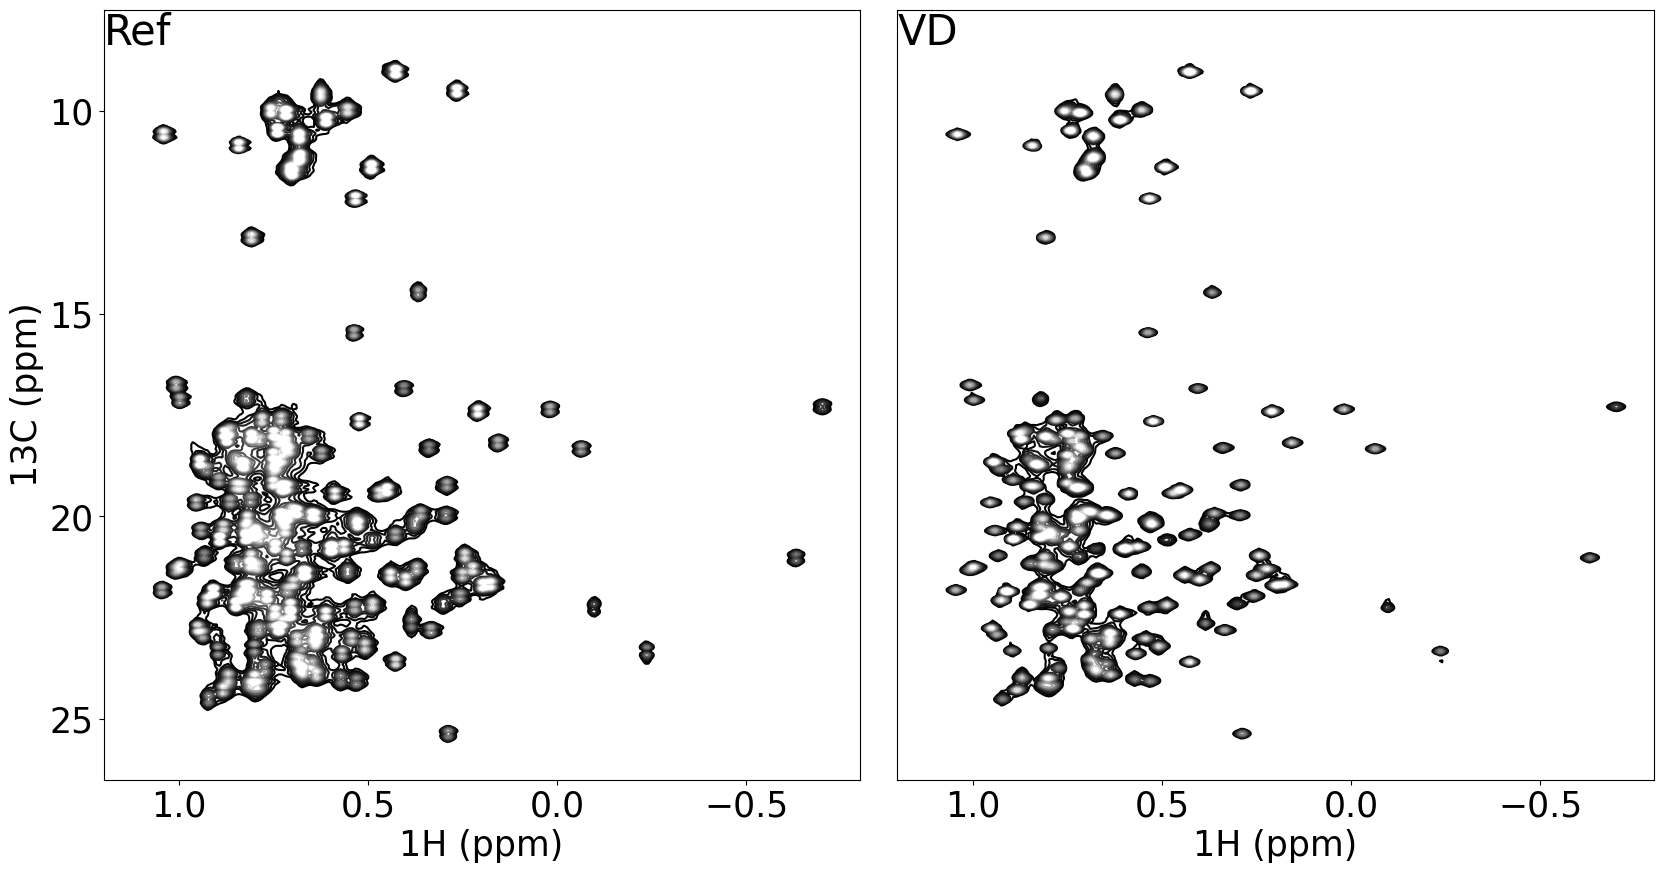

In [4]:
%%time

fig, ax = plt.subplots(1,2,figsize=(2*10,10))
cmap = [plt.cm.Greys_r,plt.cm.Reds_r]       #[+,-] contour map (colors to use for contours)
contour = [0.03,1.3,10]                     #[contour level start value, scaling factor between contour level]
lim = [1.2, -0.8,26.5, 7.5]                 #[xlim from,xlim to,ylim from,ylim to]

pr.PLOTS.subp(ax[0],Dic,Ref/np.max(Ref), "Ref",contour,cmap,lim)
pr.PLOTS.subp(ax[1],Dic,VD/np.max(VD), "VD",contour,cmap,lim)

ax[1].axes.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0.05, hspace=0.05)